In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_excel('mhs.xls')

In [3]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
data.shape

(1014, 7)

In [5]:
#no null value
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [6]:
data.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


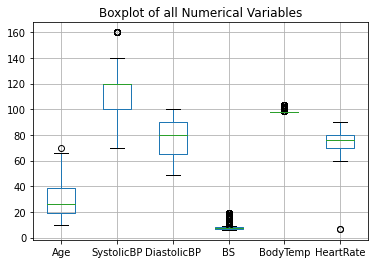

In [7]:
data.boxplot()
plt.title('Boxplot of all Numerical Variables')
plt.show()

+ In this case, since the outliers are present in both Blood Sugar (BS) and Body Temperature, it's possible that they are genuine extreme values that are outside the normal range. For example, a very high BS reading could indicate diabetes, while a very high Body Temperature reading could indicate fever. In such cases, dropping the outliers is not advisable as they contain valuable information and dropping them may result in loss of information and affect the accuracy of the model.

+ Also, this two columns will be included in the model for prediction of systolicBP because of their outliers, their high values tends to have a very high impact on the response variable. (Based on findings)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


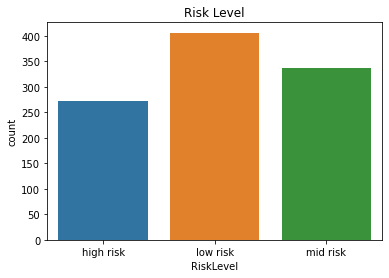

In [8]:
sns.countplot(data['RiskLevel'])
plt.title('Risk Level')
plt.show()

<AxesSubplot:>

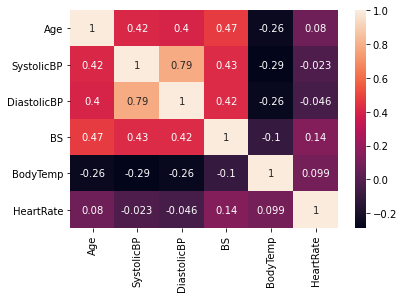

In [9]:
#plt.figure(figsize = (25,18))
sns.heatmap(data.corr(), annot = True)

## MODEL

In [10]:
from sklearn.linear_model import LinearRegression,Ridge , Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

+ Data Cleaning

In [11]:
#allocating response and explanatory variable
X = data.drop('SystolicBP', axis = 1)
y = data.SystolicBP

In [12]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
#encoding the risk level to numerical value
encoder = LabelEncoder()
X_train.RiskLevel = encoder.fit_transform(X_train.RiskLevel)
X_test.RiskLevel = encoder.transform(X_test.RiskLevel)

In [14]:
#scaling of data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

+ First and Used Model

In [15]:
#fitting of the model 
model = LinearRegression()
model.fit(X_train_sc, y_train)

LinearRegression()

In [16]:
#predictions
y_pred= model.predict(X_test_sc)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the errors
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE) {:.2f}:".format(rmse))

Mean Absolute Error (MAE): 8.94
Mean Squared Error (MSE): 125.30
Root Mean Squared Error (RMSE) 11.19:


#### Regression plot for systolicBP and Other variables

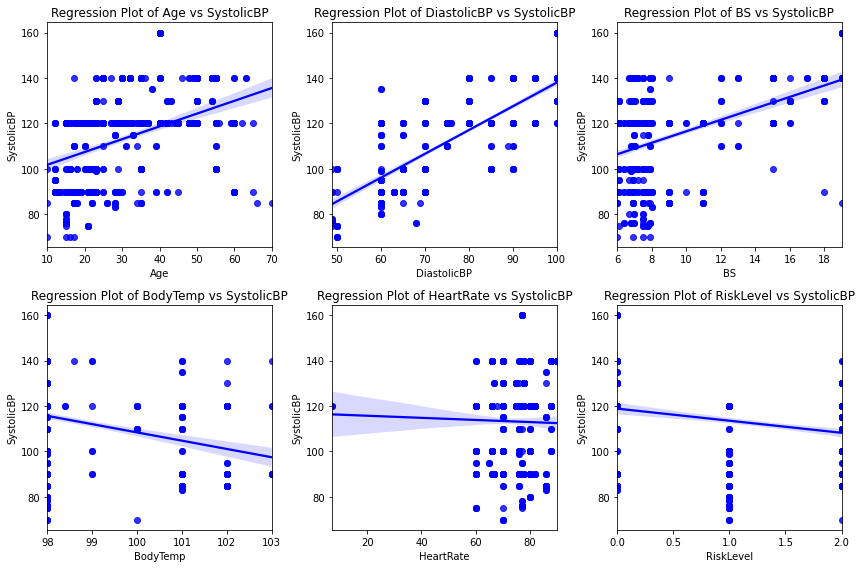

In [17]:
# creating subplots for each independent variable
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# flatten the axes array for ease of use
axes = axes.flatten()

# loop through each independent variable and plot the regression line
for i, col in enumerate(X_train.columns):
    sns.regplot(x=X_train[col], y=y_train, ax=axes[i], color='blue')
    axes[i].set_title(f"Regression Plot of {col} vs SystolicBP")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("SystolicBP")

plt.tight_layout()
plt.show()

+ The regression plot above shows how predicted line and the Values of the train model for each of the explanatory variable

In [18]:
#dataframe of prediction and test values
prediction={
    'actual':y_test,
    'prediction':y_pred
}
predictions=pd.DataFrame.from_dict(prediction)
predictions.head()

,actual,prediction
921,120,124.726493
75,130,107.293592
608,100,107.418148
630,100,102.907798
380,90,99.637833


### Selecting the best variables 
+ To verify if there will be an increment in the performance of the model

In [19]:
#second Model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Select the top 3 features based on mutual information
selector = SelectKBest(mutual_info_regression, k=3)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train the model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Make predictions on the testing set using the selected features
y_pred = model.predict(X_test_selected)

# Evaluate the performance of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print('Mean Absolute error: {:.2f}'.format(rmse))
print('Mean squared error: {:.2f}'.format(mse))
print('Root Mean squared error: {:.2f}'.format(rmse))
print('R^2 score: {:.2f}'.format(r2))

Mean Absolute error: 11.28
Mean squared error: 127.21
Root Mean squared error: 11.28
R^2 score: 0.63


+ After selecting the best three variables, the error increases which implies loss of information. since there is no overfitting detected in the first model. the first model will be used for prediction

## Dropping Body Temperature

+ Based on findings, Body temperature is found not to have a direct relationship with systolicBP. it will be dropped to see if there will be an increase in the performance of the model

In [20]:
features = X.drop('BodyTemp', axis = 1)
target = y

In [21]:
#splitting and transforming
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.3, random_state=0)

X_train.RiskLevel = encoder.fit_transform(X_train.RiskLevel)
X_test.RiskLevel = encoder.transform(X_test.RiskLevel)

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#third model

new_model = LinearRegression()
new_model.fit(X_train, y_train)

LinearRegression()

In [23]:
#predictions and error
mae = mean_absolute_error(y_test, new_model.predict(X_test))
mse = mean_squared_error(y_test, new_model.predict(X_test))
rmse = mean_squared_error(y_test, new_model.predict(X_test), squared=False)
r2 = r2_score(y_test, new_model.predict(X_test))

# Print the errors and accuracy
print('Mean Absolute error: {:.2f}'.format(rmse))
print('Mean squared error: {:.2f}'.format(mse))
print('Root Mean squared error: {:.2f}'.format(rmse))
print('R^2 score: {:.2f}'.format(r2))



Mean Absolute error: 11.30
Mean squared error: 127.76
Root Mean squared error: 11.30
R^2 score: 0.63


+ After droping the body temperature, the error increases which implies loss of information. since there is no overfitting detected in the first model. the first model will be used for prediction

## PCA

In [24]:
from sklearn.decomposition import PCA

# Separate the features (X) and response variable (y)
X = data.drop('SystolicBP', axis = 1)
X.RiskLevel = encoder.fit_transform(X.RiskLevel)
y = data.SystolicBP

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#All components will be used first to determine the number of components to select
# Perform PCA with all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get the explained variance ratios of the components
variance_ratios = pca.explained_variance_ratio_

print(variance_ratios)

[0.37300454 0.20233409 0.14882391 0.11044591 0.09559082 0.06980073]


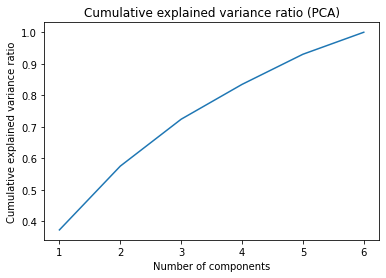

In [25]:
import matplotlib.pyplot as plt

# Plot the cumulative sum of the explained variance ratios
cumulative_variance = np.cumsum(variance_ratios)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.title('Cumulative explained variance ratio (PCA)')
plt.show()

In [26]:
# finding the number of components that sum up to at least 80% of the variance
num_components = np.where(cumulative_variance >= 0.8)[0][0] + 1
print('Number of components to explain at least 80% of the variance:', num_components)

Number of components to explain at least 80% of the variance: 4


In [27]:
# transform the data using the selected number of components
#pca = PCA(n_components=num_components) #4
pca = PCA(n_components=4) 
X_pca = pca.fit_transform(X_scaled)

#spliting into train test split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size =0.3,random_state =0)

# Train the model on the reduced features
pca_model = LinearRegression()
pca_model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred_pca = pca_model.predict(X_test)
# Evaluate the performance of the model
rmse = mean_squared_error(y_test, y_pred_pca, squared=False)
r2 = r2_score(y_test, y_pred_pca)
print('Root Mean squared error: {:.2f}'.format(rmse))
print('R^2 score: {:.2f}'.format(r2))

Root Mean squared error: 13.69
R^2 score: 0.46


+ With PCA the r2 decreases and the error increases which implies that there has been a loss of information. the PCA not seem to help because the dataset is small and there are no high correlation between the variables

### Investigating the relationship between age and heartrate 

In [29]:
#checking the minimum and maximum age
min(data.Age), max(data.Age)

(10, 70)

In [30]:
# the age groups
age_groups = ['<20 years', '20-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years', '45 years']

# Create a new column for age range based on the age column
data['age_groups'] = pd.cut(data['Age'], bins=[0, 20, 25, 30, 35, 40, 45, data['Age'].max()], labels=age_groups)

# Calculate the mean heart rate for each age range
mean_heart_rates = data.groupby('age_groups')['HeartRate'].mean()

# Print the result
print(mean_heart_rates)

age_groups
<20 years      72.694352
20-24 years    73.785366
25-29 years    77.736364
30-34 years    73.423077
35-39 years    78.716981
40-44 years    71.585366
45 years       75.471264
Name: HeartRate, dtype: float64


In [31]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,age_groups
0,25,130,80,15.0,98.0,86,high risk,20-24 years
1,35,140,90,13.0,98.0,70,high risk,30-34 years
2,29,90,70,8.0,100.0,80,high risk,25-29 years
3,30,140,85,7.0,98.0,70,high risk,25-29 years
4,35,120,60,6.1,98.0,76,low risk,30-34 years


In [32]:
#checking the number of observations that fall into each group
data.age_groups.value_counts()

<20 years      301
20-24 years    205
45 years       174
30-34 years    130
25-29 years    110
35-39 years     53
40-44 years     41
Name: age_groups, dtype: int64

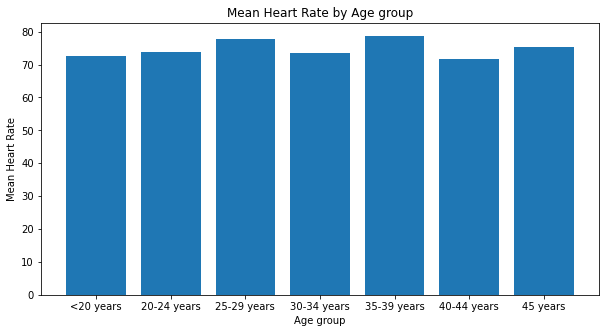

In [33]:
#Visualising
plt.figure(figsize=(10,5))
plt.bar(mean_heart_rates.index, mean_heart_rates.values)
plt.xlabel('Age group')
plt.ylabel('Mean Heart Rate')
plt.title('Mean Heart Rate by Age group')
plt.show()

### Investigating associations 

In [34]:
#droping the created age_groups for the above questions
data = data.drop('age_groups', axis = 1)
#assigning the data to df not to affect the dataframe when needed again
df = data.copy()

In [35]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [36]:
# Encode blood pressure categories as binary variables based on specify range
df['HighSystolicBP'] = df['SystolicBP'] >= 140
df['HighDiastolicBP'] = df['DiastolicBP'] >= 90
df['NormalSystolicBP'] = (df['SystolicBP'] >= 110) & (df['SystolicBP'] < 140)
df['NormalDiastolicBP'] = (df['DiastolicBP'] >= 70) & (df['DiastolicBP'] < 90)
df['LowSystolicBP'] = df['SystolicBP'] < 110
df['LowDiastolicBP'] = df['DiastolicBP'] < 70

# Drop the original blood pressure columns
df.drop(['SystolicBP', 'DiastolicBP'], axis=1, inplace=True)

# checking transformed data
df.head()

,Age,BS,BodyTemp,HeartRate,RiskLevel,HighSystolicBP,HighDiastolicBP,NormalSystolicBP,NormalDiastolicBP,LowSystolicBP,LowDiastolicBP
0,25,15.0,98.0,86,high risk,False,False,True,True,False,False
1,35,13.0,98.0,70,high risk,True,True,False,False,False,False
2,29,8.0,100.0,80,high risk,False,False,False,True,True,False
3,30,7.0,98.0,70,high risk,True,False,False,True,False,False
4,35,6.1,98.0,76,low risk,False,False,True,False,False,True


In [37]:
df.shape

(1014, 11)

In [38]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply Apriori algorithm
frequent_itemsets = apriori(df.drop(['Age', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel'], axis=1), min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Print the rules sorted by lift
rules.sort_values('lift', ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(HighSystolicBP),(HighDiastolicBP),0.128205,0.272189,0.115385,0.900000,3.306522,0.080489,7.278107
1,(HighDiastolicBP),(HighSystolicBP),0.272189,0.128205,0.115385,0.423913,3.306522,0.080489,1.513304
6,(LowSystolicBP),(LowDiastolicBP),0.339250,0.316568,0.266272,0.784884,2.479352,0.158876,3.177035
7,(LowDiastolicBP),(LowSystolicBP),0.316568,0.339250,0.266272,0.841121,2.479352,0.158876,4.158835
4,(NormalDiastolicBP),(NormalSystolicBP),0.411243,0.532544,0.335306,0.815348,1.531042,0.116301,2.531545
5,(NormalSystolicBP),(NormalDiastolicBP),0.532544,0.411243,0.335306,0.629630,1.531042,0.116301,1.589645
2,(HighDiastolicBP),(NormalSystolicBP),0.272189,0.532544,0.146943,0.539855,1.013728,0.001990,1.015888
3,(NormalSystolicBP),(HighDiastolicBP),0.532544,0.272189,0.146943,0.275926,1.013728,0.001990,1.005160


+ The first rule (row): the rule "HighSystolicBP -> HighDiastolicBP" has a support of 0.115, which means that 11.5% of the people in the dataset contain both "HighSystolicBP" and "HighDiastolicBP" and that if a person has high systolic blood pressure, there is a 90% chance that they also have high diastolic blood pressure. The lift of 3.31 indicates that the occurrence of high systolic blood pressure is 3.31 times more likely when high diastolic blood pressure occurs than when it does not. The conviction of 7.28 suggests that people with high systolic blood pressure are 7.28 times more likely to have high diastolic blood pressure than what we would expect if high systolic blood pressure and high diastolic blood pressure were independent.

### Cluster of SystolicBP

In [39]:
from sklearn.cluster import KMeans


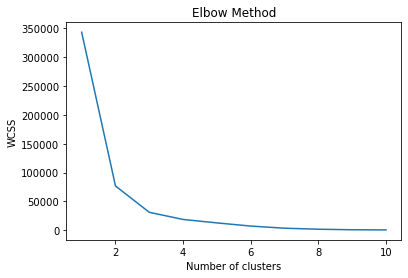

In [40]:
# Select only the Systolic BP column
X = data[['SystolicBP']].values

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

+ Although the suggested Cluster by the above chart is 3, but 4 seems to give more meaning and aligned with the existings rules

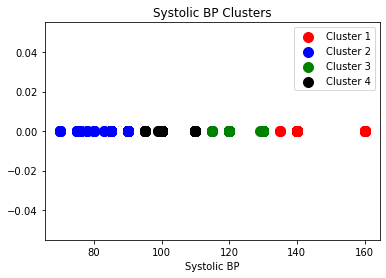

In [41]:
# Fit K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans

# Visualize the clusters
plt.scatter(X[y_kmeans == 0], np.zeros((len(X[y_kmeans == 0]),1)), s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1], np.zeros((len(X[y_kmeans == 1]),1)), s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2], np.zeros((len(X[y_kmeans == 2]),1)), s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3], np.zeros((len(X[y_kmeans == 3]),1)), s = 100, c = 'black', label = 'Cluster 4')
#plt.scatter(kmeans.cluster_centers_[:, 0], np.zeros((len(kmeans.cluster_centers_),1)), s = 300, c = 'yellow', label = 'Centroids')
plt.title('Systolic BP Clusters')
plt.xlabel('Systolic BP')
plt.legend()
plt.show()

+ The Blue group are found to be low systolic 
+ The Black and Green are Normal systolic 
+ The red are High Systolic 

### Correlation Between Age and SystolicBP

In [42]:
# Calculate the correlation between age and systolic BP
corr = data["Age"].corr(data["SystolicBP"])

# Print the correlation
print("Correlation between Age and SystolicBP: {:.2f}" .format(corr))

Correlation between Age and SystolicBP: 0.42


+ There is a weak positive relationship between Age and Systolic BP. This means that as age increases, there tends to be a slight increase in systolic BP as well.